In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn import svm

In [2]:
import urllib.request as req
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/winequality-red.txt'
req.urlretrieve(url, 'red-wine.txt')

('red-wine.txt', <http.client.HTTPMessage at 0x24f20e115c0>)

In [3]:
df1 = pd.read_csv('red-wine.txt', sep='\t', index_col=0) 

In [4]:
df1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

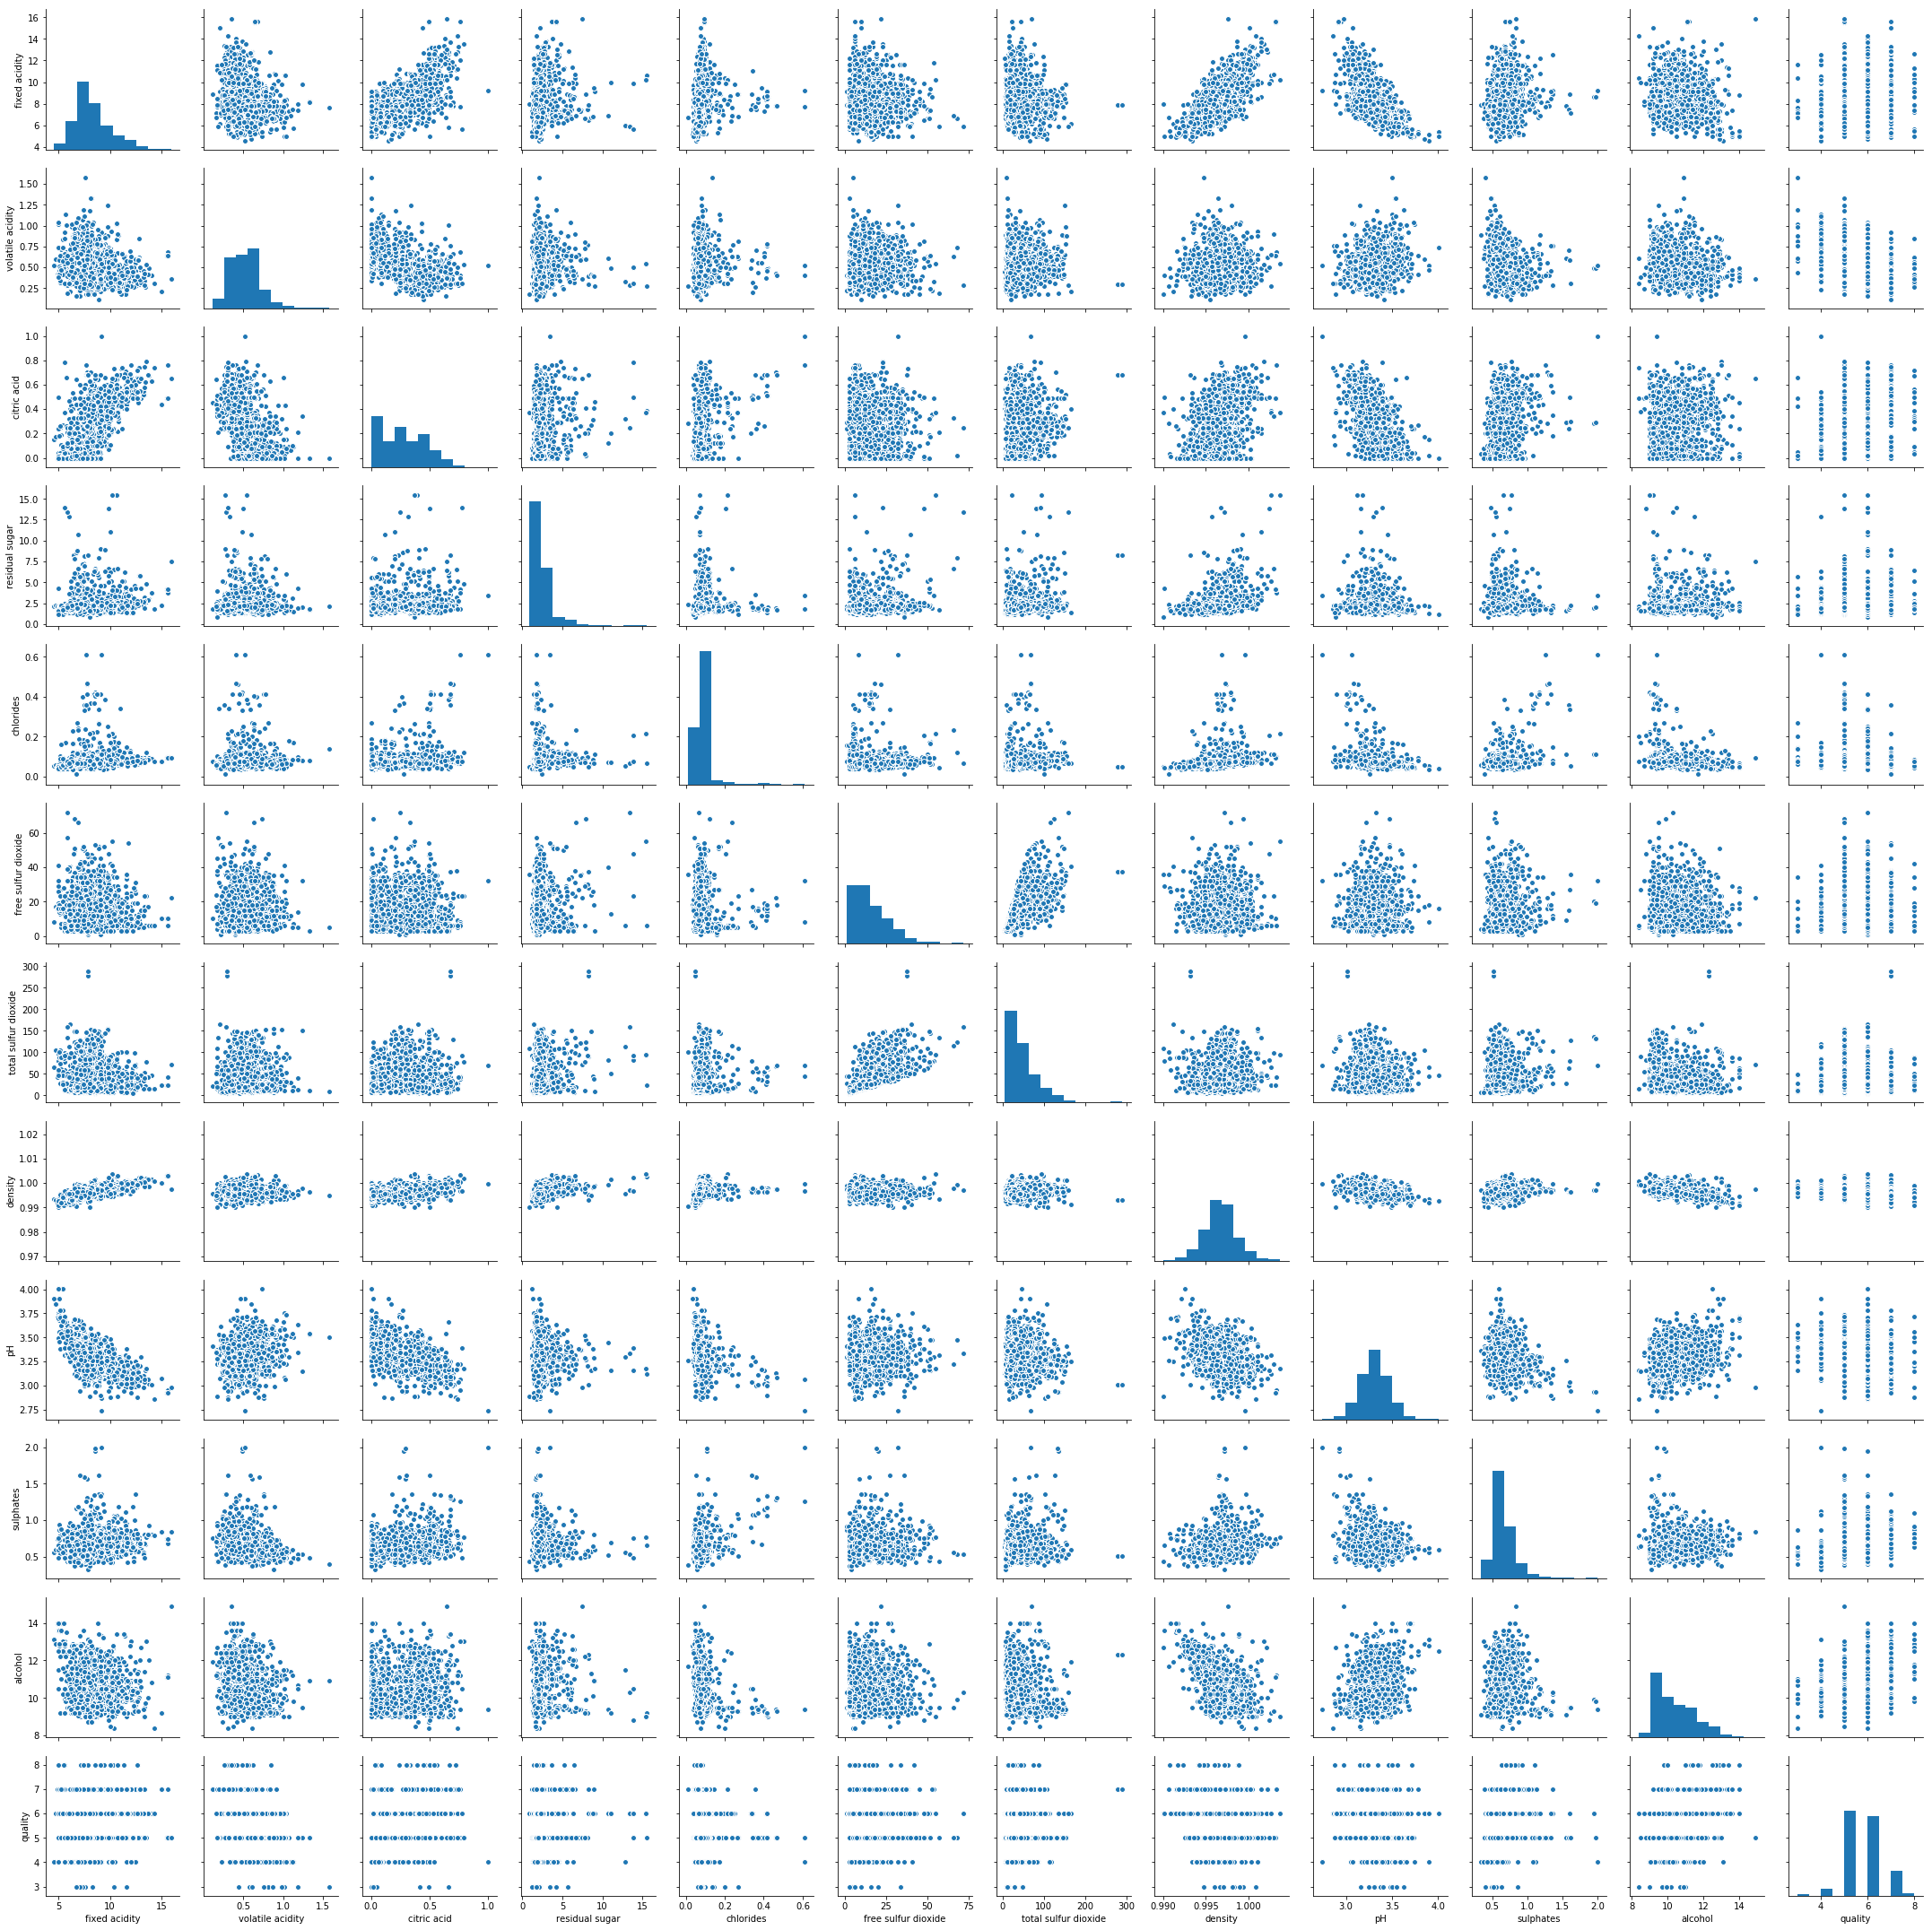

In [29]:
sns.pairplot(df1)

In [5]:
x_data = df1.drop('quality', axis=1)
y = df1['quality']

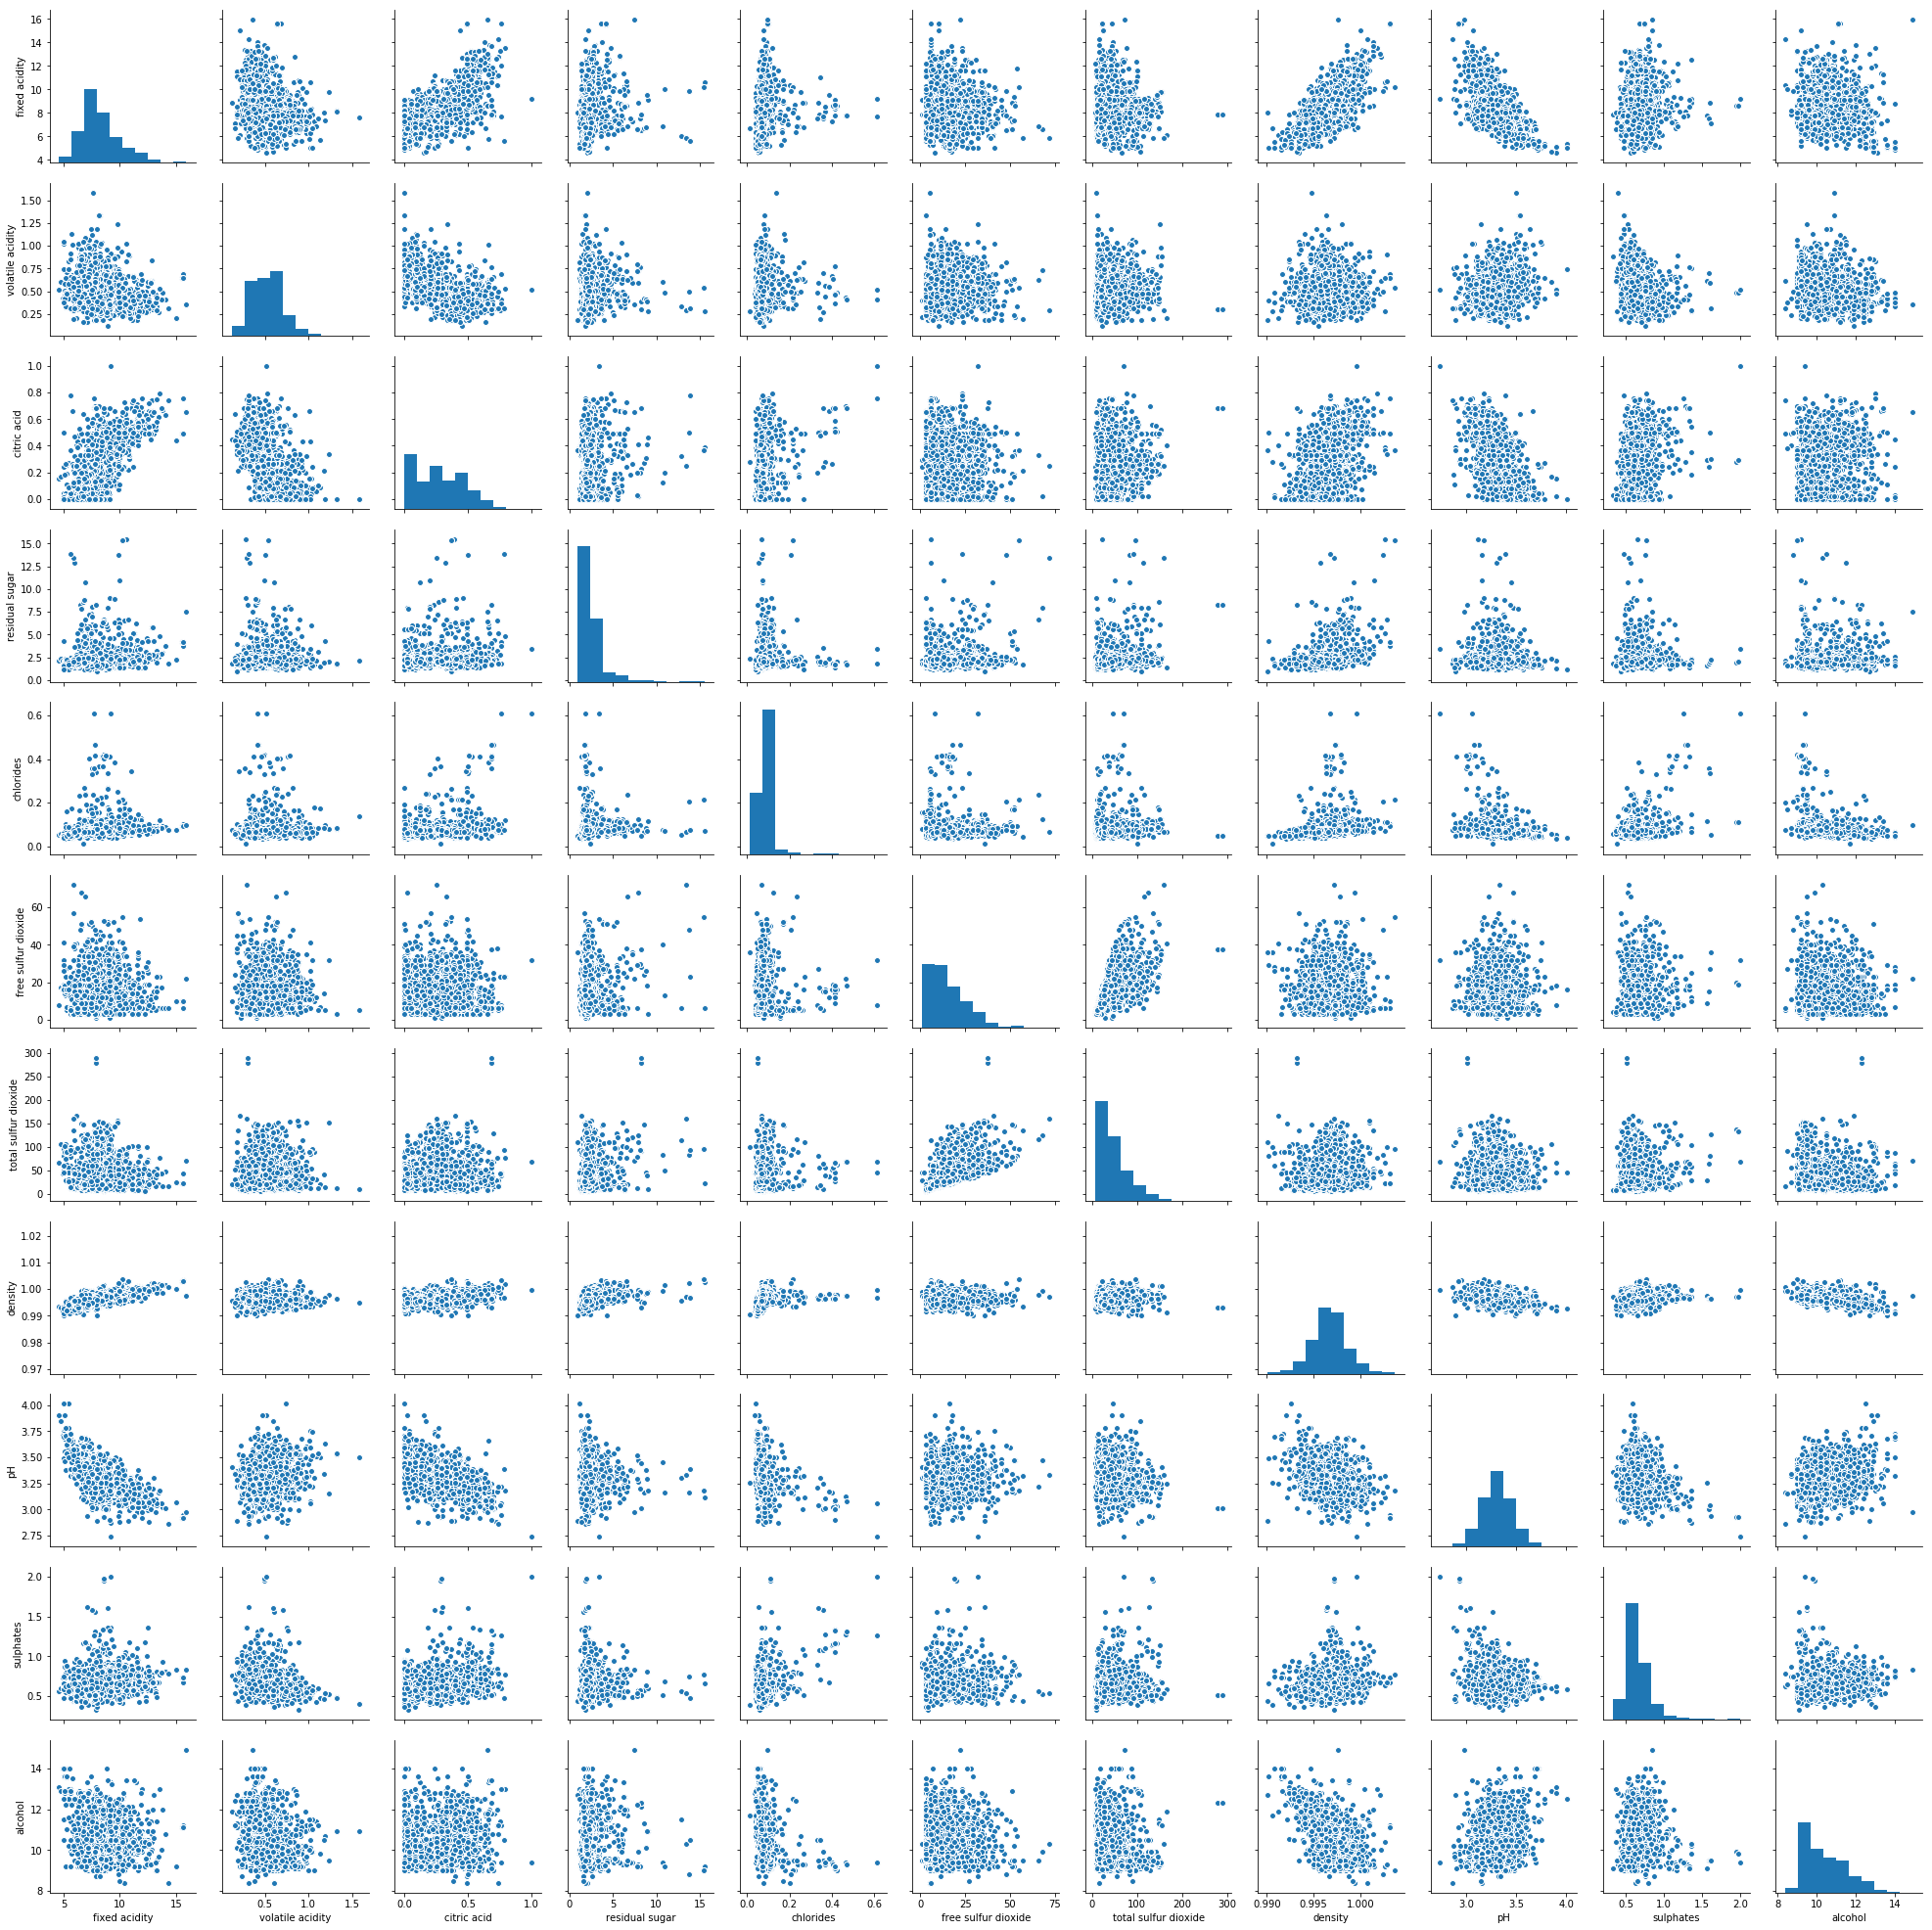

In [6]:
sns.pairplot(x_data)

In [7]:
x_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [27]:
x = x_data.copy()

In [18]:
for key in x:
    if x[key].skew() > 0.75:
        x[key] = np.log(x[key] + 1)

In [19]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.128232              0.70         0.00        0.724990   0.070692   
1       2.174752              0.88         0.00        0.824585   0.089375   
2       2.174752              0.76         0.04        0.785691   0.084351   
3       2.501436              0.28         0.56        0.724990   0.069825   
4       2.128232              0.70         0.00        0.724990   0.070692   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             2.484907              3.555348   0.9978  3.51   0.367892   
1             3.258097              4.219508   0.9968  3.20   0.417916   
2             2.772589              4.007333   0.9970  3.26   0.405982   
3             2.890372              4.110874   0.9980  3.16   0.376671   
4             2.484907              3.555348   0.9978  3.51   0.367892   

    alcohol  
0  2.341806  
1  2.379546  
2  2.379546  
3  2.379546  
4  2.341806

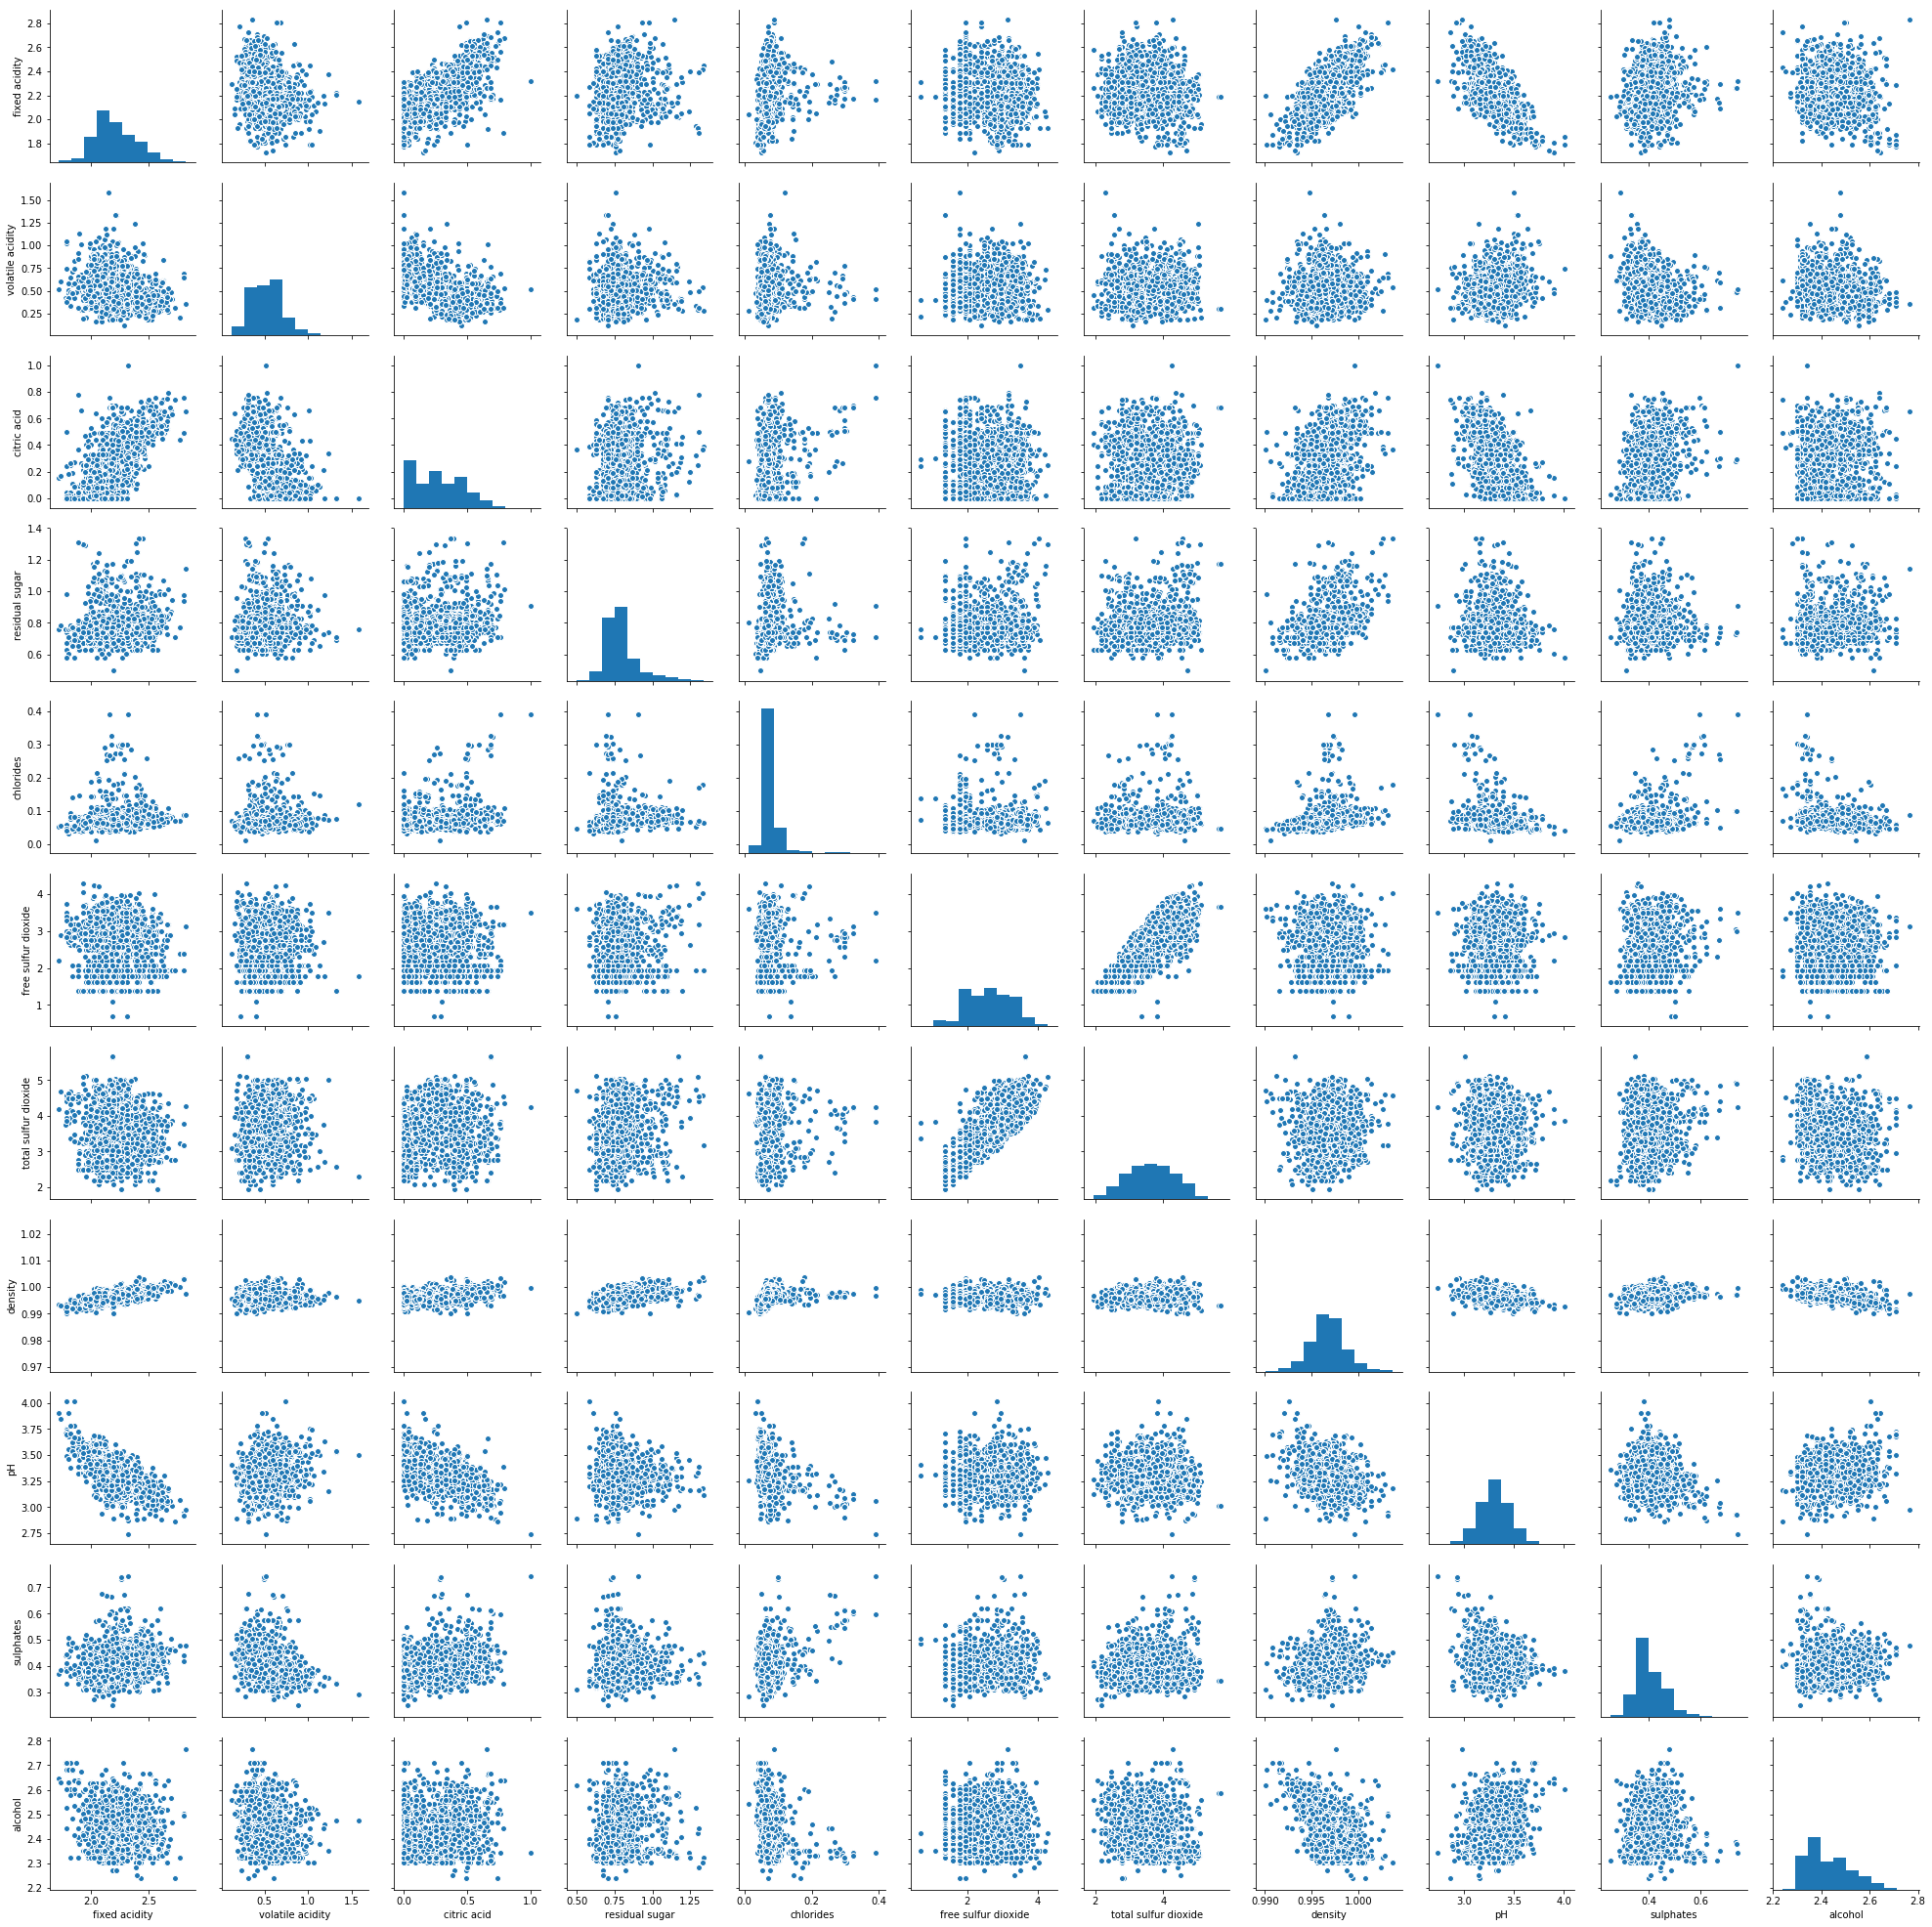

In [20]:
sns.pairplot(x)

In [17]:
x['alcohol'].skew()

0.86082880688885377

In [37]:
for key1 in x_data:
    x[key1 + '05'] = np.sqrt(x[key1])
    x[key1 + '3'] = x[key1] ** 3
    for key2 in x_data:
        x[key1 + key2] = x[key1] * x[key2]
        x[key1 + 2 * key2] = x[key1] * x[key2] ** 2
        x[key1 * 2 + key2] = x[key1] ** 2 * x[key2] 

In [38]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

           ...            alcoholdensitydensity  alcoholalcoholdensity  \
0          ...                         9.358685              88.165608   
1          ...                         9.737380              95.732672   
2          ...                         9.741288              95.751880   
3          ...                         9.760839              95.847920   
4          ...                         9.358685              88.165608   

   alcoholpH  alcoholpHpH  alcoholalcoholpH  alcoholsulphates  \
0     32.994    115.80894          310.1436             5.264   
1     31.360    100.35200          307.3280             6.664   
2     31.948    104.15048          313.0904             6.370   
3     30.968     97.85888          303.4864             5.684   
4     32.994    115.80894          310.1436             5.264   

   alcoholsulphatessulphates  alcoholalcoholsulphates  alcoholalcohol  \
0                    2.94784                  49.4816           88.36   
1                    4.53152                  65.3072           96.04   
2                    4.14050                  62.4260           96.04   
3                    3.29672                  55.7032           96.04   
4                    2.94784                  49.4816           88.36   

   alcoholalcoholalcohol  
0                830.584  
1                941.192  
2                941.192  
3                941.192  
4                830.584  

[5 rows x 385 columns]

In [39]:
x = (x - x.mean(axis=0))/x.std(axis=0)

In [22]:
x_train = x[:1200]
x_val = x[1200:]
y_train = y[:1200]
y_val = y[1200:]

In [23]:
model1 = svm.SVC(kernel='linear')
model1.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
model1.score(x_train, y_train)

0.57999999999999996

In [25]:
model1.score(x_val, y_val)

0.61152882205513781

In [28]:
model2 = linear_model.LinearRegression()
model2.fit(x,y)
model2.score(x,y)

0.36055170303868822

In [175]:
df1_norm = (df1 - df1.mean(axis=0))/df1.std(axis=0)

In [176]:
df1_norm.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
1      -0.298454          1.966827    -1.391037        0.043403   0.223805   
2      -0.298454          1.296660    -1.185699       -0.169374   0.096323   
3       1.654339         -1.384011     1.483689       -0.453077  -0.264878   
4      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466047             -0.379014  0.558100  1.288240  -0.579025   
1             0.872365              0.624168  0.028252 -0.719708   0.128910   
2            -0.083643              0.228975  0.134222 -0.331073  -0.048074   
3             0.107558              0.411372  0.664069 -0.978798  -0.461036   
4            -0.466047             -0.379014  0.558100  1.288240  -0.579025   

     ...     density2  density3       pH2       pH3  sulphates2  sulphates3  \
0    ...     0.557410  0.556717  1.296814  1.301146   -0.488394   -0.356500   
1    ...     0.027305  0.026357 -0.727109 -0.731719    0.001731   -0.078430   
2    ...     0.133283  0.132344 -0.349977 -0.367282   -0.129694   -0.158170   
3    ...     0.663495  0.662916 -0.974638 -0.967209   -0.413294   -0.317446   
4    ...     0.557410  0.556717  1.296814  1.301146   -0.488394   -0.356500   

   alcohol2  alcohol3  quality2  quality3  
0 -0.921738 -0.879851 -0.797793 -0.787524  
1 -0.591155 -0.592167 -0.797793 -0.787524  
2 -0.591155 -0.592167 -0.797793 -0.787524  
3 -0.591155 -0.592167  0.385475  0.312280  
4 -0.921738 -0.879851 -0.797793 -0.787524  

[5 rows x 36 columns]